## Comparison with Gearbox

In [3]:
"""The same simulation about our Reticulum as Compare with Rapidchain"""

import random
import matplotlib.pyplot as plt
import numpy as np

# Set the number of nodes, number of groups, group size, and number of trials
num_nodes = 240
num_groups = 16
group_size = 15
num_trials = 1

results = []
time_results=[]
baseline=[]
rresult=[]


# Loop through different percentages of Byzantine nodes
for n in range(31):
    successes = 0
     # Run the trials
    for _ in range(num_trials):
        # Create a list of nodes with some percentage of Byzantine nodes
        num_byzantine = int(num_nodes * n / 100)
        nodes = [True] * (num_nodes - num_byzantine) + [False] * num_byzantine
        random.shuffle(nodes)

        # Divide the nodes into groups
        groups = [nodes[i:i+group_size] for i in range(0, num_groups * group_size, group_size)]
        # Count the number of groups that have no Byzantine nodes
        num_successful_groups = sum(all(group) for group in groups)
        successes += num_successful_groups
        
    # Calculate the average number of successful groups for this percentage of Byzantine nodes
    avg_successes = successes / num_trials
    
    # Add the result to the list of results
    results.append((n, avg_successes))

for n, avg_successes in results:
    # T1=15 lambda=35
    # Calculate the time per transaction for this percentage of Byzantine nodes
    rresult.append(avg_successes)
    time_results.append((4096*16)/((16-avg_successes)*(35)+15))
    baseline.append((4096*16)/(16*35+15))
    
storage=[]
storage_base=[]
for n, avg_successes in results:
    # Calculate the storgae per transaction for this percentage of Byzantine nodes
    storage.append(((2*15*avg_successes+2*240*(16-avg_successes))/(4096*16))*1024)
    storage_base.append((2*240*16/(4096*16))*1024)




In [4]:
import random

"""The simulation about Gearbox:
    We generated 2400 nodes and there are four gears, gears size are 15,30,60,240. We calculate it from the Shard size.ipynb with failure rate fall in 10^-7 and 10^-8.
    We assign nodes into shard randomly and check if the adversarial nodes in the shard is more than this shard's livness threshold or we turn to a bigger one.
    we keep doing this until all the shard can run normally and then calculate the average shard size. Also,we calculate the overlap time.
"""

"""Function run_simulation used for find the average shard size of Gearbox in different adversarial nodes ratio.
    Input:
        n: The adversarial nodes ratio in the system(upper bound).
        
    Output:
        average shard size of all shard
        
"""
def run_simulation(n):
    # Calculate the number of Byzantine nodes based on the percentage 'n'
    byzantine_nodes = int(n / 100 * 2400)
    results = []
    for i in range(16):
        # Step 1: Select a sample of 15 nodes
        sample_1 = random.sample(range(2400), 15)
        if any(node < byzantine_nodes for node in sample_1):
            # Step 2: Select a sample of 30 nodes
            sample_2 = random.sample(range(2400), 30)
            # Count the number of Byzantine nodes in sample_2
            num_byzantine_nodes = sum(1 for node in sample_2 if node < byzantine_nodes)
            if num_byzantine_nodes > 4:
                # Step 3: Select a sample of 60 nodes
                sample_3 = random.sample(range(2400), 60)
                # Count the number of Byzantine nodes in sample_3
                num_byzantine_nodes = sum(1 for node in sample_3 if node < byzantine_nodes)
                if num_byzantine_nodes > 17:
                    results.append(240)
                else:
                    results.append(60)
            else:
                results.append(30)
        else:
            results.append(15)
    # Calculate the average number of records
    return sum(results) / len(results)

gresult = []
goverlap = []
for n in range(31):
    results = []
    for i in range(1):
        # Run the simulation for 'n' and obtain the average number of records
        avg_records = run_simulation(n)
        results.append(avg_records)
    # Calculate the average results over multiple runs
    avg_results = sum(results) / len(results)
    gresult.append(avg_results)
    print(f"n={n}: {avg_results}")
    # Calculate the overlap time by dividing the average results by 16
    print(f"overlap time: {avg_results/16}")
    goverlap.append(avg_results / 16)

n=0: 15.0
overlap time: 0.9375
n=1: 17.8125
overlap time: 1.11328125
n=2: 17.8125
overlap time: 1.11328125
n=3: 21.5625
overlap time: 1.34765625
n=4: 22.5
overlap time: 1.40625
n=5: 22.5
overlap time: 1.40625
n=6: 25.3125
overlap time: 1.58203125
n=7: 24.375
overlap time: 1.5234375
n=8: 28.125
overlap time: 1.7578125
n=9: 27.1875
overlap time: 1.69921875
n=10: 30.0
overlap time: 1.875
n=11: 27.1875
overlap time: 1.69921875
n=12: 37.5
overlap time: 2.34375
n=13: 41.25
overlap time: 2.578125
n=14: 32.8125
overlap time: 2.05078125
n=15: 40.3125
overlap time: 2.51953125
n=16: 42.1875
overlap time: 2.63671875
n=17: 41.25
overlap time: 2.578125
n=18: 56.25
overlap time: 3.515625
n=19: 67.5
overlap time: 4.21875
n=20: 69.375
overlap time: 4.3359375
n=21: 56.25
overlap time: 3.515625
n=22: 62.8125
overlap time: 3.92578125
n=23: 60.9375
overlap time: 3.80859375
n=24: 88.125
overlap time: 5.5078125
n=25: 108.75
overlap time: 6.796875
n=26: 116.25
overlap time: 7.265625
n=27: 170.625
overlap time

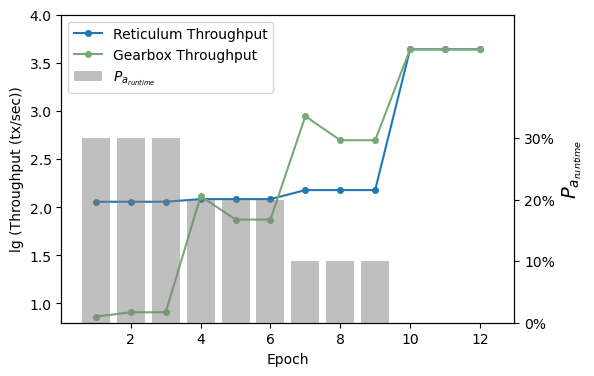

In [5]:
import matplotlib.pyplot as plt
import numpy as np

"""We set that Gearbox try to a smaller shard size in every epoch if it is not the smallest gear now.
    The SVj+SBj= 0.16*j+14, this formula is test by our sever and network, it would be changed according to different situation.
    However, no matter how formula changed, we use the same formula to test Gearbox and ours, it is fair.
"""

Byzantine = [30, 30, 30, 20, 20, 20, 10, 10, 10, 0, 0, 0]

r_results = []
r_s=[]
g_s=[]
g_results = []

# Calculating values for Reticulum throughput
for i in Byzantine:
    a=((16-rresult[i])*240)
    b=(15*(rresult[i]))
    r_s.append(((a+b)/16)*2/4096*1024)
    r_results.append(time_results[i])
    
# Initializing values for Gearbox throughput
for i in Byzantine:
    g_results.append(0)
    g_s.append((gresult[i]*goverlap[i])*2/4096*1024)
    
# Calculating values for Gearbox throughput based on specific conditions
g_results[0]=(4096*16/((((gresult[30]*0.16+14+(15+30+60)*0.16+14)*goverlap[30]*(gresult[30]/15)))))
g_results[1]=(4096*16/((((gresult[30]*0.16+14+60*0.16+14)*goverlap[30]*(gresult[30]/15)))))
g_results[2]=(4096*16/((((gresult[30]*0.16+14+60*0.16+14)*goverlap[30]*(gresult[30]/15)))))
g_results[3]=(4096*16/(((gresult[20]*0.16+14)*goverlap[20]*(gresult[20]/15))))
g_results[4]=(4096*16/((((gresult[20])*0.16+14+30*0.16+14)*goverlap[20]*(gresult[20]/15))))
g_results[5]=(4096*16/((((gresult[20])*0.16+14+30*0.16+14)*goverlap[20]*(gresult[20]/15))))
g_results[6]=(4096*16/((((gresult[10]*0.16+15))*goverlap[10]*(gresult[10]/15))))
g_results[7]=(4096*16/(((gresult[10]*0.16+14+15*0.16+14)*goverlap[10]*(gresult[10]/15))))
g_results[8]=(4096*16/((((gresult[10]*0.16+14+15*0.16+14)*goverlap[10]*(gresult[10]/15)))))
g_results[9]=(4096*16/15)
g_results[10]=(4096*16/15)
g_results[11]=(4096*16/15)

# Plotting a bar
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Plotting the Reticulum throughput as a line graph
ax.plot(range(1, 13), np.log10(r_results), label="Reticulum Throughput", color="#1F77B3", marker='o', markersize=4)
# Converting r_results to logarithmic scale on the y-axis

# Plotting the Gearbox throughput as a line graph
ax.plot(range(1, 13), np.log10(g_results), label="Gearbox Throughput", color="#77AA77", marker='o', markersize=4)
# Converting g_results to logarithmic scale on the y-axis

ax.set_ylabel("lg (Throughput (tx/sec))")

# Creating a twin x-axis for the bar plot
ax2 = ax.twinx()

# Plotting the bar graph for $P_{a_{runtime}}$
ax2.bar(range(1, 13), Byzantine, alpha=0.5, align="center", label="$P_{a_{runtime}}$", color="gray")

ax2.set_xlabel("Epoch")
ax2.set_ylabel("$P_{a_{runtime}}$", fontsize=14)
ax2.set_ylim([0, 50])
ax2.set_yticks([0, 10, 20, 30])
ax2.set_yticklabels(['{}%'.format(int(i)) for i in ax2.get_yticks()])

# Combining the legends from both plots
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2
ax.legend(handles, labels, loc='upper left', fontsize='medium')

ax.set_xlabel('Epoch')
ax.set_ylim([0.8, 4])

fig.subplots_adjust(right=0.88)

# Saving the figure as a PDF
plt.savefig('./fig/Gearbox_fig1.pdf', format='pdf', transparent=True)

# Displaying the plot
plt.show()

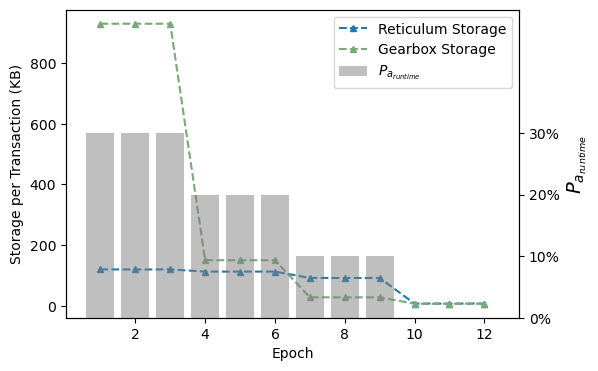

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Plotting the Reticulum storage as a dashed line graph
ax.plot(range(1, 13), r_s, label="Reticulum Storage", linestyle='--', marker='^', markersize=4, color="#1F77B3")
# r_s represents the storage values for Reticulum

# Plotting the Gearbox storage as a dashed line graph
ax.plot(range(1, 13), g_s, label="Gearbox Storage", linestyle='--', marker='^', markersize=4, color="#77AA77")
# g_s represents the storage values for Gearbox

ax.set_ylabel("Storage per Transaction (KB)")

# Creating a twin x-axis for the bar plot
ax3 = ax.twinx()

# Plotting the bar graph for $P_{a_{runtime}}$
ax3.bar(range(1, 13), Byzantine, alpha=0.5, align="center", label="$P_{a_{runtime}}$", color="gray")

ax3.set_xlabel("Epoch")
ax3.set_ylabel("$P_{a_{runtime}}$", fontsize=14)
ax3.set_ylim([0, 50])
ax3.set_yticks([0, 10, 20, 30])
ax3.set_yticklabels(['{}%'.format(int(i)) for i in ax3.get_yticks()])

# Combining the legends from both plots
handles3, labels3 = ax.get_legend_handles_labels()
handles4, labels4 = ax3.get_legend_handles_labels()
handles0 = handles3 + handles4
labels2 = labels3 + labels4
ax.set_xlabel('Epoch')
ax.legend(handles0, labels2, loc='upper right', fontsize='medium')

fig.subplots_adjust(right=0.88)

# Saving the figure as a PDF
plt.savefig('./fig/Gearbox_fig2.pdf', format='pdf', transparent=True)

# Displaying the plot
plt.show()

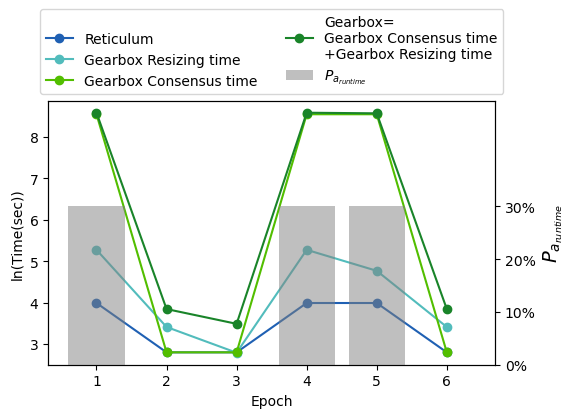

In [7]:
import matplotlib.pyplot as plt
import numpy as np

Byzantine = [30, 0, 0, 30, 30,0]

r_result = []
r_s=[]
g_s=[]
g_all_t=[]
g_resize_t=[]
g_results= []

# Calculating values for Reticulum Time
for i in Byzantine:
    a=((16-rresult[i])*250)
    b=(15*(rresult[i]))
    r_result.append(((a+b)/16)*0.16+14)
    g_resize_t.append(1)
# Initializing values for Gearbox Time
for i in Byzantine:
    g_results.append(0)
g_results[0]=((((gresult[30]*0.16+14)*goverlap[30]*(gresult[30]/15))))
g_results[1]=15*0.16+14
g_results[2]=15*0.16+14
g_results[3]=((((gresult[30]*0.16+14)*goverlap[30]*(gresult[30]/15))))
g_results[4]=((((gresult[30]*0.16+14)*goverlap[30]*(gresult[30]/15))))
g_results[5]=15*0.16+14
# Updating values for Gearbox Resize Time
g_resize_t[0] = (15 + 30 + 60) * goverlap[30] * 0.16 + 14
g_resize_t[1] = gresult[15] * goverlap[15] * 0.16 + 14
g_resize_t[2] = gresult[0] * goverlap[0] * 0.16 + 14
g_resize_t[3] = (15 + 30 + 60) * goverlap[30] * 0.16 + 14
g_resize_t[4] = (60) * goverlap[30] * 0.16 + 14
g_resize_t[5] = gresult[15] * goverlap[15] * 0.16 + 14

for i in range(0,6):
    g_all_t.append(g_resize_t[i]+g_results[i])

# Set the x-values for each data point
x_values = np.arange(1, 7)

# Create a figure with a single subplot
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Plot each set of data as a line
ax.plot(x_values, np.log(r_result), label="Reticulum",marker="o", color="#1F60B3")
ax.plot(x_values, np.log(g_resize_t), label="Gearbox Resizing time",marker="o", color="#52bcbc")
ax.plot(x_values, np.log(g_results), label="Gearbox Consensus time",marker="o", color="#52be00")
ax.plot(x_values, np.log(g_all_t), label="Gearbox=\nGearbox Consensus time\n+Gearbox Resizing time ",marker="o", color="#198429")

# Set axis labels and legend
ax.set_ylabel("ln(Time(sec))")
ax.set_xlabel("Epoch")
ax.set_xticks(x_values)
ax.legend(fontsize='x-small')
# make a plot
ax2 = ax.twinx()
ax2.bar(range(1, 7), Byzantine, alpha=0.5, align="center", label="$P_{a_{runtime}}$",color="gray")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("$P_{a_{runtime}}$",fontsize=14)
ax2.set_ylim([0, 50])
ax2.set_yticks([0,10,20,30])
ax2.set_yticklabels(['{}%'.format(int(i)) for i in ax2.get_yticks()])
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2

ax.legend(handles, labels, loc='lower center',fontsize='medium', bbox_to_anchor=(0.50, 1), ncol=2)
ax.set_xlabel('Epoch')
# Save the figure
fig.subplots_adjust(top=0.77,right=0.87)
plt.savefig('./fig/Gearbox_fig3.pdf', format='pdf', transparent=True)
# Show the figure
plt.show()
